In [20]:
import matplotlib
# %matplotlib inline
import os
import numpy as np
import seaborn as sns # for plots
import pandas as pd
import matplotlib.pyplot as plt

import SUITPy as suit
import surfAnalysisPy as sa
import nibabel as nb
import nitools as nt

import Functional_Fusion.dataset as fdata
import Functional_Fusion.atlas_map as am
import selective_recruitment.plotting as splotting
import selective_recruitment.scripts.script_overlap_map_wm as soverlap
import selective_recruitment.scripts.script_roi_similarity as ssimil
import selective_recruitment.plotting as splotting
import selective_recruitment.globals as gl

from statsmodels.stats.anova import AnovaRM # perform F test
from matplotlib.colors import LinearSegmentedColormap
from nilearn import plotting
from pathlib import Path

import warnings
warnings.filterwarnings('ignore')

# Correlation between forwards and backwards per load per phase

## Parcellation

In [33]:
D = ssimil.calc_corr_per_load(atlas_space = "SUIT3", 
                        subj = None,
                        ses_id = "ses-02", 
                        smooth = False, 
                        parcellation="NettekovenSym68c32", 
                        subtract_mean = True, 
                        type = "CondAll", 
                        verbose = False)

<AxesSubplot: xlabel='load', ylabel='R_fwbw'>

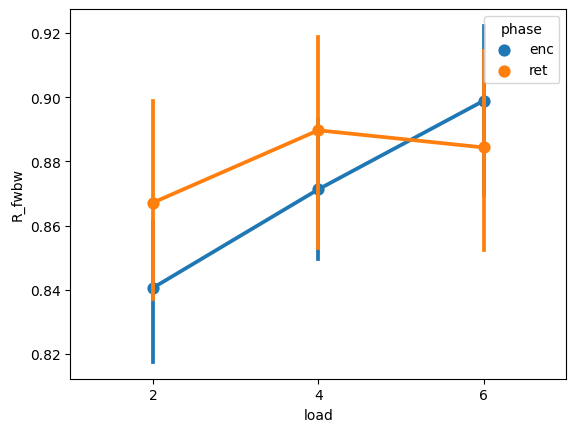

In [34]:
roi_name = "D3R"
DD = D.loc[D.roi_name == roi_name]
sns.pointplot(data = DD, x = "load", y = "R_fwbw", hue = "phase")

## Parcellation divided into anterior and posterior

In [5]:
D = ssimil.calc_corr_per_load(atlas_space = "SUIT3", 
                        subj = None,
                        ses_id = "ses-02", 
                        smooth = False, 
                        parcellation="NettekovenSym68c32AP", 
                        subtract_mean = True, 
                        type = "CondAll", 
                        verbose = False)

In [29]:
# add a new field defining hemi and anterior vs posterior
D["half"] = D["roi_name"].str[-1]
D["hemi"] = D["roi_name"].str[2]
D = D.loc[D.roi != 0]
print(AnovaRM(data=D.loc[D.hemi == "R"], depvar='R_fwbw',
              subject='sn', within=["load", "phase", "half"], aggregate_func=np.mean).fit())

                    Anova
                F Value Num DF  Den DF Pr > F
---------------------------------------------
load            16.7775 2.0000 30.0000 0.0000
phase           20.4442 1.0000 15.0000 0.0004
half            10.8530 1.0000 15.0000 0.0049
load:phase       6.2008 2.0000 30.0000 0.0056
load:half        2.5546 2.0000 30.0000 0.0945
phase:half       1.7879 1.0000 15.0000 0.2011
load:phase:half  0.1313 2.0000 30.0000 0.8775



<AxesSubplot: xlabel='load', ylabel='R_fwbw'>

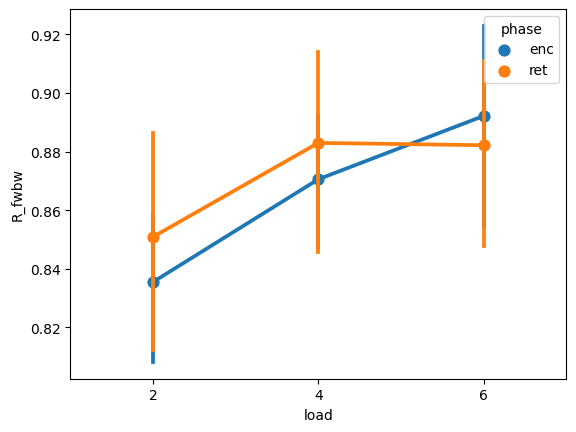

In [30]:
roi_name = "D3R_A"
DD = D.loc[D.roi_name == roi_name]
sns.pointplot(data = DD, x = "load", y = "R_fwbw", hue = "phase")

In [31]:
print(AnovaRM(data=DD, depvar='R_fwbw',
              subject='sn', within=["load", "phase"], aggregate_func=np.mean).fit())

                 Anova
           F Value Num DF  Den DF Pr > F
----------------------------------------
load        8.1290 2.0000 30.0000 0.0015
phase       0.1021 1.0000 15.0000 0.7537
load:phase  1.7753 2.0000 30.0000 0.1868



[0.01022405 0.17451317 0.04336882 0.10399091 0.06239154 0.02994228
 0.13450954 0.07897475 0.01955085 0.2698717  0.05437104 0.15269035
 0.19673236 0.05481344 0.3494297  0.18281525]


[Text(0, 1, 'D1L_P'),
 Text(0, 3, 'D2L_P'),
 Text(0, 5, 'D3L_P'),
 Text(0, 7, 'D4L_P'),
 Text(0, 0, 'D1L_A'),
 Text(0, 2, 'D2L_A'),
 Text(0, 4, 'D3L_A'),
 Text(0, 6, 'D4L_A'),
 Text(0, 9, 'D1R_P'),
 Text(0, 11, 'D2R_P'),
 Text(0, 13, 'D3R_P'),
 Text(0, 15, 'D4R_P'),
 Text(0, 8, 'D1R_A'),
 Text(0, 10, 'D2R_A'),
 Text(0, 12, 'D3R_A'),
 Text(0, 14, 'D4R_A')]

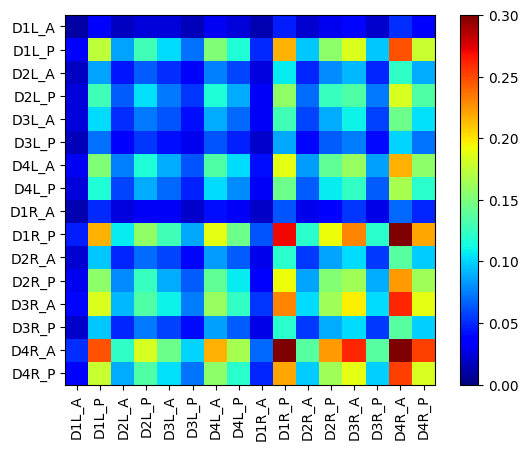

In [38]:
G, W, Glam, Ginf, colors_D = ssimil.calc_G_group(center = False)
print(np.diag(G))
fig, ax = plt.subplots()
plt.imshow(G, cmap = 'jet')
plt.colorbar()
plt.clim([0, 0.3])
ax.set_xticks(Ginf['region_id'].values)
ax.set_yticks(Ginf['region_id'].values)
ax.set_xticklabels(labels = Ginf['region_name'].values, rotation = 90)
ax.set_yticklabels(labels = Ginf['region_name'].values, rotation = 0)

[1.88126641e+00 2.83446337e-02 5.31984229e-03 1.63202368e-03
 6.26661983e-04 4.30264377e-04 2.47805951e-04 1.24867670e-04
 9.60251627e-05 6.89064429e-05 2.83051677e-05 3.99564546e-06
 1.44160441e-16 5.48177597e-18 0.00000000e+00 0.00000000e+00]


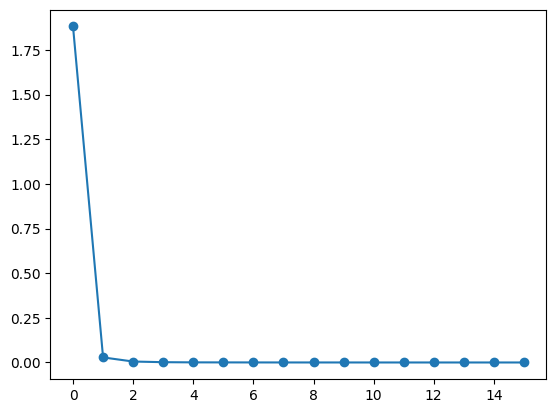

In [39]:
plt.plot(Glam, '-o')
print(Glam)

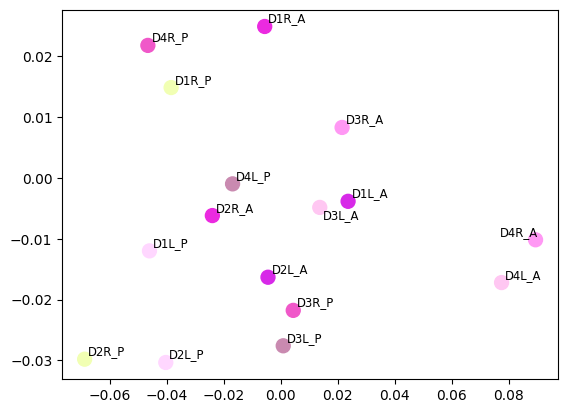

In [40]:
splotting.plot_MDS(W[:, 1], W[:, 2], Ginf, colors_D, text_size = 'small', text_weight = 'regular')